## DS103 Metrics and Data Processing Lesson 5 Hands On

In [2]:
install.packages("vembedr")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpsAPKGI/downloaded_packages


In [3]:
library(vembedr)

In [4]:
embed_vimeo("636544198")

Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/636544198

In [1]:
## load libraries
library("corpcor")
library("GPArotation")
library("psych")
library("IDPmisc")

In [2]:
## load data
data = read.csv('../../../Data/studentSurvey.csv')

In [3]:
## inspect data
head(data)

,Timestamp,Gender,Faculty,Engineering.Program,Law.Program,Business.Program,Arts.Program,Other.Program,Bachelor..Academic.Year.in.EU,Masters.Academic.Year.in.EU,...,Q3,Q4,Q5,Q6..What.are.the.best.aspects.of.the.program..,Q7..In.your.opinion.the.best.aspect.of.the.program.is,Q8..In.your.opinion.the.next.best.aspect.of.the.program.is,What.aspects.of.the.program.could.be.improved.,Do.you.feel.that.the.quality.of.education.improved.at.EU.over.the.last.year.,Do.you.feel.that.the.image.of.the.University.improved.over.the.last.year.,Username
,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,1/25/2016 14:37,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,4,5,5,Teaching/Learning,Teaching/Learning,Teaching/Learning,Yes,Yes,NA
2,1/25/2016 14:38,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,4,4,5,5,Faculty,Faculty,Teaching/Learning,Yes,Yes,NA
3,1/25/2016 14:40,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,4,5,3,Teaching/Learning,Teaching/Learning,Faculty,Yes,Yes,NA
4,1/25/2016 14:43,Male,Arts,NA,,,B.A. in English,NA,3rd Year,,...,4,3,4,5,Teaching/Learning,Teaching/Learning,Teaching/Learning,Yes,Yes,NA
5,1/25/2016 14:45,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,4,4,3,2,Teaching/Learning,Faculty,Overall learning environment,Yes,Yes,NA
6,1/25/2016 14:47,Female,Arts,NA,,,B.A. in English,NA,4th Year,,...,3,4,5,5,Faculty,Overall learning environment,Faculty,Yes,Yes,NA


In [4]:
## subset data
dataArea = data[, 31:42]

In [13]:
## remove na
dataArea2 = NaRV.omit(dataArea)

In [14]:
dataMatrix = cor(dataArea2)

In [15]:
View(round(dataMatrix, 2))

,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12
Area1,1.00,0.55,0.56,0.43,0.42,0.49,0.48,0.50,0.47,0.49,0.43,0.46
Area2,0.55,1.00,0.53,0.50,0.50,0.53,0.57,0.45,0.41,0.54,0.53,0.54
Area3,0.56,0.53,1.00,0.47,0.48,0.59,0.54,0.49,0.45,0.51,0.50,0.56
Area4,0.43,0.50,0.47,1.00,0.54,0.50,0.47,0.43,0.35,0.45,0.46,0.53
Area5,0.42,0.50,0.48,0.54,1.00,0.48,0.47,0.35,0.39,0.47,0.52,0.57
Area6,0.49,0.53,0.59,0.50,0.48,1.00,0.63,0.55,0.47,0.56,0.56,0.57
Area7,0.48,0.57,0.54,0.47,0.47,0.63,1.00,0.47,0.43,0.54,0.58,0.58
Area8,0.50,0.45,0.49,0.43,0.35,0.55,0.47,1.00,0.41,0.43,0.41,0.51
Area9,0.47,0.41,0.45,0.35,0.39,0.47,0.43,0.41,1.00,0.46,0.47,0.42
Area10,0.49,0.54,0.51,0.45,0.47,0.56,0.54,0.43,0.46,1.00,0.53,0.55


In [16]:
cortest.bartlett(dataArea2)

R was not square, finding R from data



$chisq
[1] 2807.707

$p.value
[1] 0

$df
[1] 66

In [17]:
det(dataMatrix)

[1] 0.002180645

In [18]:
model = principal(dataArea2, nfactors = 12, rotate = 'none')

In [19]:
model

Principal Components Analysis
Call: principal(r = dataArea2, nfactors = 12, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12
Area1  0.71  0.35  0.19  0.34 -0.22 -0.14  0.07  0.02 -0.04  0.37 -0.01 -0.11
Area2  0.76 -0.05  0.09  0.11 -0.39 -0.02  0.25  0.19  0.08 -0.37 -0.08 -0.06
Area3  0.76  0.14  0.12  0.05 -0.08 -0.22 -0.45 -0.16 -0.19 -0.20  0.00  0.14
Area4  0.69 -0.32  0.34  0.18  0.22  0.32 -0.04  0.21 -0.26  0.03  0.00  0.04
Area5  0.70 -0.43  0.01  0.28  0.15 -0.15 -0.07 -0.12  0.41  0.05 -0.02  0.08
Area6  0.79  0.08 -0.01 -0.29  0.05  0.15 -0.25  0.06  0.16  0.04 -0.28 -0.29
Area7  0.77 -0.03 -0.09 -0.32 -0.19  0.03 -0.11  0.29  0.13  0.15  0.30  0.16
Area8  0.68  0.37  0.36 -0.25  0.30 -0.02  0.25 -0.10  0.13 -0.06 -0.03  0.17
Area9  0.64  0.36 -0.46  0.29  0.32  0.08  0.00  0.16  0.01 -0.13  0.10 -0.02
Area10 0.74  0.00 -0.20  0.01 -0.22  0.41  0.08 -0.42 -0.0

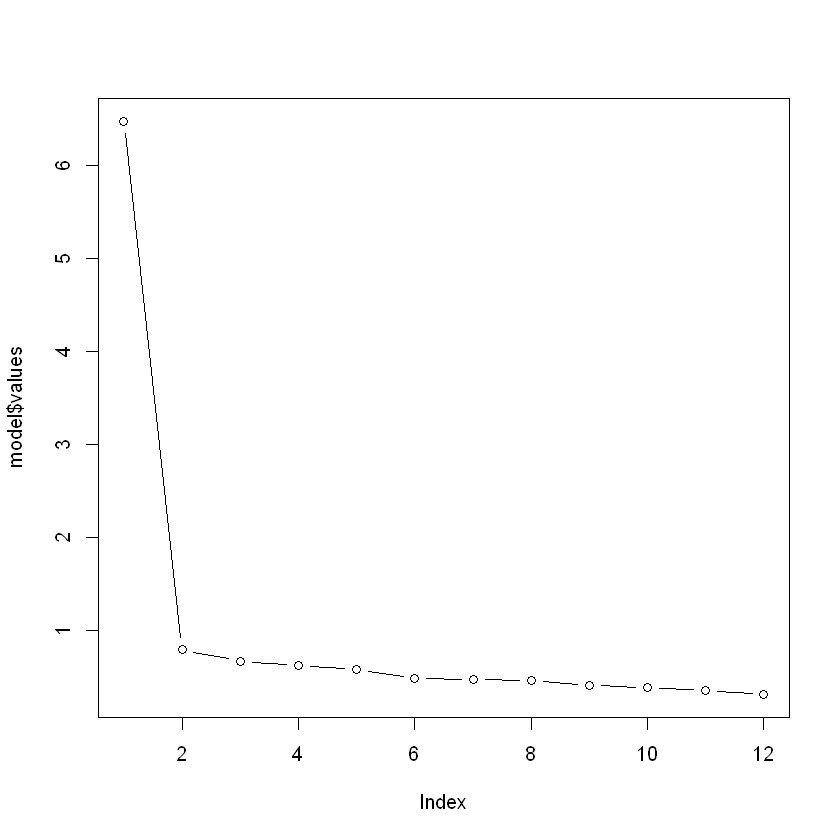

In [20]:
plot(model$values, type ='b')